# ILWISPy

Notebook prepared by Ben Maathuis, Martin Schouwenburg and Bas Retsios. ITC-University of Twente, Enschede. The Netherlands

ILWISPy is a Python library for processing, accessing and writing geodata. The library handles raster data (2D/3D), vector data and tabular data. The core/backend of the new ILWISPy is a general purpose GIS library written in C++. Its modular architecture (supported by Qt) allows programmers to write native plugins (C++) to extend the libraries interoperability or processing functionality. The user can import the whole ILWIS functionality into Python, which facilitates writing high level scripts for multi source geo processing in a standard scripting environment. ILWISPy is running on different platforms, e.g. on Linux as well as on Windows based operating systems, for Python versions 3.6 and higher.  ILWISPy can be directly imported in Python, but can also be used within a Jupyter Notebook, offering the capability of markdown text with explanations and subsequent coding fields to execute certain operations. This tutorial therefore provides a brief introduction into the ILWISPy API as a plugin in Python, executed within a Jupyter Notebook.

This notebook will highlight how to obtain information on the various operations available within the library and how to use the fuctionality provided using the ILWISPy library. For visualization of the results you can use ILWIS-386 desktop version, available at: https://filetransfer.itc.nl/pub/52n/ILWIS386/Software/. Special attention in this notebook is given to the interoperability of ILWISPy with a number of common used Python libraries. 

All ILWISPy releases are adhering to the GNU GENERAL PUBLIC LICENSE - GPL3 (https://www.gnu.org/licenses/gpl-3.0.en.html). The  ILWISPy development team is consisting of Bas Retsios, Martin Schouwenburg, Willem Nieuwenhuis, Lichun Wang and Ben Maathuis, from the Faculty ITC, University of Twente, Enschede, The Netherlands. For questions or further information don't hesitate to contact the ILWISPy team members Bas Restsios or Ben Maathuis at v.retsios@utwente.nl / b.h.p.maathuis@utwente.nl respectively.

### Why ILWISPy
The way currently remote sensing images, derived products and data is provided has changed the ways how this information is being processed. Traditionally a stand-alone system was used with a number of software tools to process / analyse the data. Nowadays information from the cloud is accessed and processing is done using tools provided by these cloud based service providers. Once analysis has been conducted, the final products are downloaded to integrate these with existing, local data sources for final analysis. In short some of the advantages bulletwise:

+ Greater flexibility and added functionality, not limited by certain GIS/RS desktop software tools;
+ Once code developed (within a Jupyter Notebook) it is easy to modify, re-use / add other (sample) code;
+ Looping possibilities, e.g. useful for time series processing;
+ Flexibility in input / output format selection;
+ Use of ILWISPy makes overall coding more simple as plain statements are used to execute operations;
+ ILWISPy operations like ‘map calculation’ could expand to 20 or more lines of Numpy code if ILWIS-mapcalc is not available. This code-expansion might be a disadvantage as users might get lost in the code syntax itself, which in turn prevents them to focus on the methodology / application; 
+ Partially overcomes the issue of time required to 'learn full Python based' coding and specific coding required when multiple site-packages offering Remote Sensing and GIS operations have to be used instead;
+ ILWISPy has a large collection of operations having a capability to perform all the basic GIS/RS operations required (which would otherwise require already a number of other site-packages / libraries);
+ Extending ILWISPy functionally with other Python packages increases the overall required GIS/RS functionality, e.g. using ‘Scikit-learn' incorporating a large number of machine learning functionality;
+ All tools used (like Python, ILWISPy, ILWIS386, Jupyter Notebook and other site packages) are having small file sizes, can be easily installed locally.

#### Within this notebook an introduction is provided to a number of topics:
+ Basic steps to install ILWISPy 
+ Spatial objects and their relations in ILWISPy
+ The ILWISPy Library
+ Working with Raster Data - RasterCoverages
+ Data translation from ILWISPy data format to Python Numpy and vise versa
+ Working with Vector Data -FeatureCoverages
+ Working with Tables

Additional installation instruction and updated information can be obtained at: https://www.itc.nl/about-itc/organization/scientific-departments/water-resources/software-tools-models/ilwis3-and-toolbox-plugins/ilwispy-getting-started/. Special attention has been given to the use of Python to show the seamless synergy with ILWISPy functionality to process geo spatial information. For visualization of the data used in the notebook or of the processing results obtained use can be made of ILWIS 3.8.6. 

## ILWISPy under Python - Jupyter Notebook
#### Installation instructions when using Windows OS:
First steps using ILWIS under Python requires installation of ILWISPy as a site-package. If working using a Linux Ubuntu Operating System, a Linux - ILWISPy version for Python 3.8 is available. For Windows Operating Systems various Python based versions are supported, e.g. Python 3.6 up to Python 3.11. 

The wheels can be downloaded from 'https://filetransfer.itc.nl/pub/52n/ilwis_py/wheels/ ', note the *"whatsnew.txt"* file, check the information provided, subsequently select the folder related to your operating system (windows or linux) and navigate to the most recent dated folder to download the required wheel for your Python version.

Install the wheel corresponding to your Python version, as example below the ILWISPy version for Python39 (64bits) is used. Using the command prompt from the Python39 folder, type the following command:

    "python -m pip install Ilwispy* - *.Whl"

note: * - * is representing the wheel version used, here for python39, 64 bits, e.g. *ilwis-1.0.20230330-cp39-cp39-win_amd64.whl*. If you have installed a previous version of ILWISPy, you can use the procedure described above to reinstall a more recent version, the older version will be removed and the new version will be installed.

It is assumed furthermore that the Jupyter Notebook site package has already been installed.

To check if your ILWISPy installation was successful, use the Command Shell, navigate to your Python folder, start Python and within the Python Command Shell execute the following expressions:

+  import ilwis
+  ilwis.version()

Use quit() or Ctrl-Z plus Return to exit.

**Now you are ready to explore ILWISPy.**

### Quick overview 
The figure / table below provides an overview of geospatial data and the relationship between them as used in ILWISPy. For example raster data, here called a 'RasterCoverage' requires next to the actual raster data, a GeoReference and a DataDefinition. Same is applicable to vector data, although other elements might be required. Review the figure below for the linkage of the various geospatial elements, their description is given in the table. 

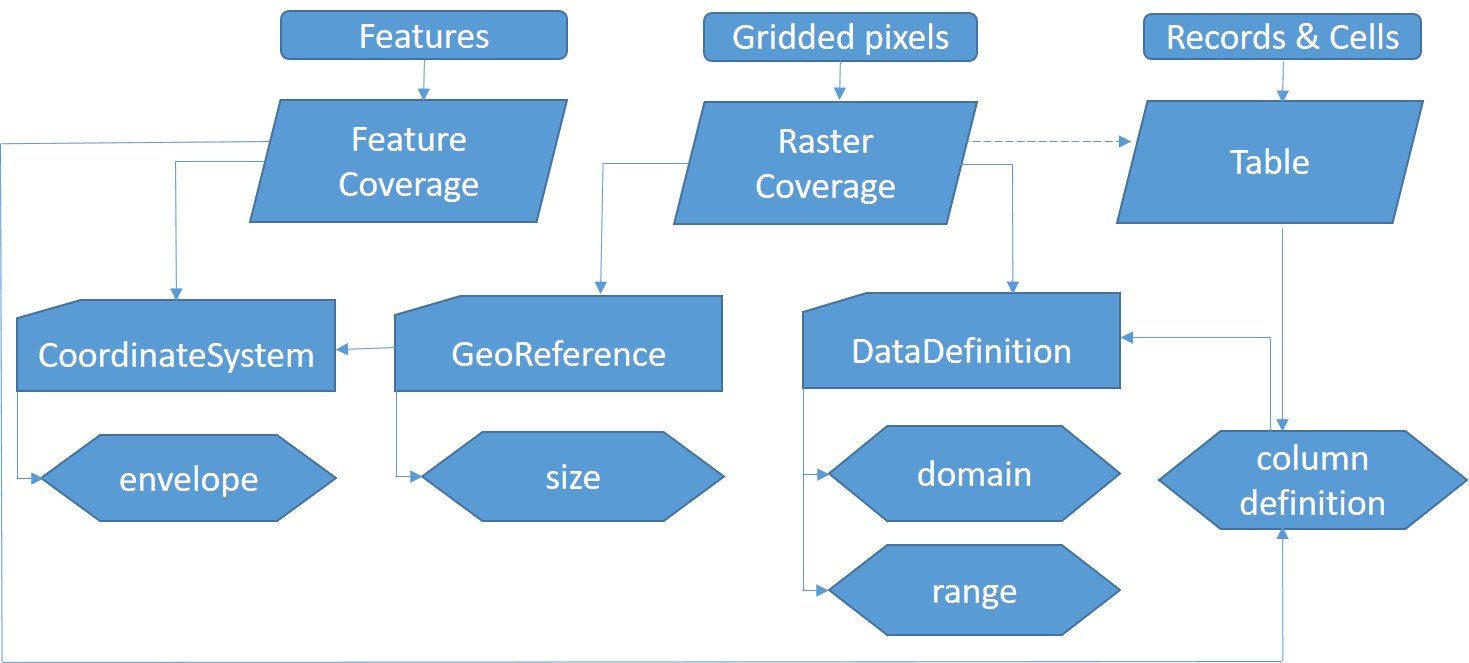

| Geo Spatial Element | Description |
|:----------|:---------|
| RasterCoverage | Gridded raster data in 2D or 3D. Numeric values or thematic data |
| FeatureCoverage | Vector data in points, lines and polygons with attribute data |
| Table | Tabular data for numeric, string and thematic data|
| DataDefinition | Defines what type of data is used and what valid entries (range) are available |
| Domain | The datatype of the data. Can numeric (various), string, identifier/thematic (various), date/time etc...|
| Range | Describes the valid range of values that are allowed for certain DataDefinition. e.g the number 0 to 100. For numeric data this includes the resolution of the numbers.|
| GeoReference | The Geometry of a RasterCoverage. What is the connection of the pixels in the grid and the real world coordinates.|
| Size | Simple object to hold X/Y/Z size.|
| Envelope | Object to define the area (rectangular) in real world coordinates of an object|
| CoordinateSystem | Definition of a real world reference system to define locations. |
| ColumnDefinition | Simple combination of a datadefinition and a columnname. Is the same for features and tables though in the former case we often use the name attribute.

At your disposal are a set of functions, which are called **'Operations'** and provide access to all the processing capability available within the ILWISPy library able to handle and manipulate the various geo spatial elements indicated above. 

### Getting familiar with the ILWISPy Library
First step using ILWISPy under Python is loading the required libraries, including some of the required python libraries, like os, for the use of operating system dependent functionality, numerical python and matplotlib, a comprehensive library for creating static, animated, and interactive visualizations. Next to ILWISPy use is made of this added functionality.

In [ ]:
#load required required libraries
from ctypes import *
lib1 = cdll.LoadLibrary(r'/home/jovyan/.local/lib/libGLdispatch.so.0.0.0')
lib1 = cdll.LoadLibrary(r'/home/jovyan/.local/lib/libGLX.so.0.0.0')
lib1 = cdll.LoadLibrary(r'/home/jovyan/.local/lib/libGL.so.1.7.0')

lib1 = cdll.LoadLibrary('/opt/conda/lib/libpython3.11.so.1.0')
lib1 = cdll.LoadLibrary('/opt/conda/envs/openeo/lib/libQt5Gui.so.5')
lib1 = cdll.LoadLibrary('/opt/conda/envs/openeo/lib/libQt5Sql.so.5')
lib1 = cdll.LoadLibrary('/opt/conda/envs/openeo/lib/libQt5Concurrent.so.5')


import os
import ilwis
import numpy as np
import matplotlib.pyplot as plt

To check the ILWIS version activated as Python site package

In [ ]:
ilwis.version()

#### Different types of operations
Within the ILWISPy Library a collection of operations are at the users disposal. There are operations that provide information about the object and there are operations that perform a manipulation on source data provided and create new output.

+ The first collection of operations have a command syntax in the form of: ***object.operation(parameters)***.
+ The second set of operations are executed in the form of: ***outputdata = ilwis.do(operationname, inputdata, parameters)***.

A number of operations are a function of the object. Examples related to raster objects are: array2raster,  pix2value, statistics and size, etc. Some of them will be further introduced below. These operations can be used to retrieve metadata, these 'object.operations' never modify the object itself. 

### Working with geo-spatial data using ILWISPy - data mining and metadata handling

Let us see if we can access some raster data and get familiar with some of the objects mentioned above. If we work with disk based data it is often practical to set your working catalog. The use of path names to find your data is no longer required.

In [ ]:
#use the Python function os.getcwd() to retrieve the current folder used and add a sub-folder
work_dir = os.getcwd() + '/Intro_ILWISPy'

 #set the working directory for ILWISPy
ilwis.setWorkingCatalog(work_dir)
print(work_dir)

Get a listing of the catalog - folder for a specific item, below a listing is provided for all raster layers, *(.it.RASTER)* can be replaced by ilwis type such as POINT, FEATURE, POLYGON, etc.

In [ ]:
ilwis.catalogItems(ilwis.it.RASTER)

This shows all rasters in the current working catalog. ilwis.catalogItems() will show all objects in their roles. This sometimes can be a bit confusing sometimes as an object can appear multiple times in the list in different roles. E.g. a GTiff file can be a raster, obviously, but it also can be (used as) a Georeference as it contains all information to function as a GeoReference. See what happens

In [ ]:
ilwis.catalogItems()

So it it often wiser to use a filter to know exactly what you are viewing/searching. Let's now turn to how to access the data. We start with data in a raster or regular grid format.

## Raster data

It is advised to familiarize yourself, before you contine, with the sample data used in this notebook. You can use ILWIS 3.8.6 (available at: https://filetransfer.itc.nl/pub/52n/ILWIS386/ - in the folder 'Software'). If not familiar with with ILWIS check also the folder 'Tutorial' for additional information on installation and using the desktop version.

#### Working with single layer raster data 
Having set the location where to find the data (workingCatalog) we don't need a full path any longer and can open the raster coverage directly, even if the raster file is not in a native ILWIS format. Here the initial file format is GeoTif.The raster data is containing NDVI values in a range from 1 to 255 - represented from light yellow to dark green respectively, the water and areas outside Africa are assigned as no-data and are assigned 'white' in the figure below. Further below you will also create raster visualization, here a picture of the raster is given for your reference.

NDVI image over Africa
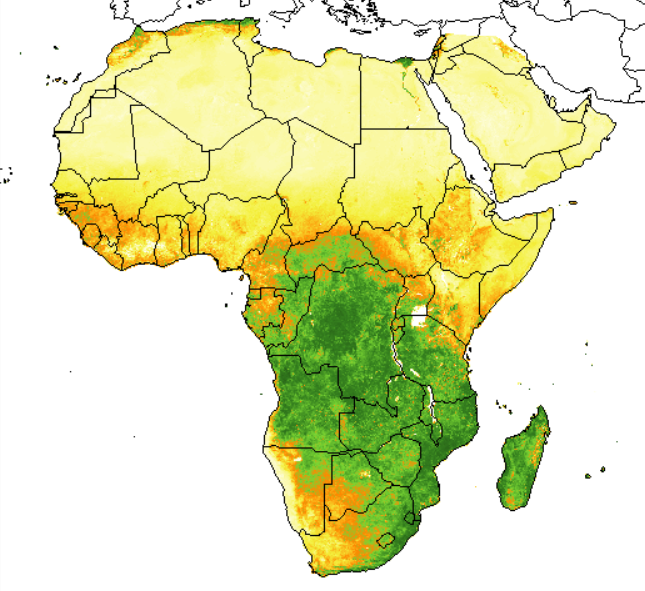

Loading the raster data

In [ ]:
raster = ilwis.RasterCoverage ('ndvi.tif')

Check the raster dimensions

In [ ]:
print(raster.size())

Apparently it is a raster of X size 1152 pixels, Y size 1152 pixels and contains only one band, in this case the NDVI values of Africa and part of the Middle East. An ILWISPy raster may contain many bands and is still considered one rastercoverage.

In [ ]:
print(raster.envelope())

This is the size of the raster in real world coordinates. Order of corner coordinates is Min X, Min Y, Max X, Max Y. Obviously not latlon so lets try to find out what kind of coordinate system is used.

In [ ]:
coordSys = raster.coordinateSystem()
coordSys.toWKT()

Apparently it uses a projection that is 'Albers Conic Equal Area' and 'Clarke 1866' as ellipsoid. Another well known definition is if we try to find its proj4 definition. PROJ is a library for performing conversions between cartographic projections. 

In [ ]:
coordSys.toProj4()

Though there is much more to say about the exact geometry of the data lets now turn to the data itself. First let us examine what type of data of the raster. As was shown in the diagram above the type of the data is encapsulated by the datadefinition. So let's start there  

In [ ]:
datadef = raster.datadef()
print(datadef.domain())

Every datadefinition contains an attribute that is called 'Domain'. It encapsulates the type of data that is describes by this definition. Here the data type is 'image' or a Byte / Unsigned Integer 8 data type . Another common data type / domain is 'value'. ILWISPy internally uses a float-64 data type in memory, but upon data storage on disk the data type and precision can be defined by the user.

Let's have a look at the data contained in the raster into more detail, e.g. by creating the raster statisics. First create a histogram listing. Note that the binning interval used is 2

In [ ]:
stats = raster.statistics(ilwis.PropertySets.pHISTOGRAM)
print(stats.histogram())

Note the last tuple (-1e+308, 803014.0) which actually indicates if 'no data' is appearing in the image, which is clearly the case here as there are quite a lot of pixels which are assigned no-data (803014.0). Below we create additional statistical objects that contains some of the other basic  descriptive statistical information for this raster. 

In [ ]:
print(stats[ilwis.PropertySets.pMIN]) # minimum value on the map
print(stats[ilwis.PropertySets.pMAX]) # maximum value on the map
print(stats[ilwis.PropertySets.pMEAN]) # average value, excluding undefs - nodata
print(stats[ilwis.PropertySets.pCOUNT]) # total number of pixels including undefs - nodata
print(stats[ilwis.PropertySets.pNETTOCOUNT]) # total number of pixels excluding undefs - nodata
print(stats[ilwis.PropertySets.pSUM]) # sum of all values, excluding undefs - nodata

To plot the histogram, the commonly used Python library 'Matplotlib' can be used. The library was already loaded and a plot can be created. Note the last tuple (containing the no-data) is not taken into consideration when creating the plot

In [ ]:
x=[a for (a,b) in stats.histogram()][:-1] #don't plot the last tuple
y=[b for (a,b) in stats.histogram()][:-1] #don't plot the last tuple

plt.plot(x,y,label='Raster values')
plt.xlabel('Data Range')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()

It is also possible to retrieve the value at a certain X, Y location, taking into consideration that the row/column index will start from 0,0. Note that when reviewing your result using the map in a desktop GIS the row / column numbers likely will start at 1,1 for the first pixel in the first row. Therefore to check manually the value in the map you will have to correct for this offset, so the actual column / row number is 501/701!

In [ ]:
raster.pix2value(ilwis.Pixel(500,700)) # for column,row (x,y) respectively               

This gives the value of pixel at location (x,y) 500,700. Note that pixel locations start at 0,0. The function is fairly expensive (in terms of performance) but useful when inspecting individual locations in a raster. A better way if one wants to do some (simple) processing is the 'PixelIterator'.

In [ ]:
pixIter = iter(raster) # creates an iterator than can move over all the pixels.
pixIterAlt = raster.begin() # same iterator

#printing all the positions of pixels with the value 222
for i in range(raster.size().linearSize()): 
    v = float(pixIter)
    if (v == 222):
        print(str(pixIter.position()))
    pixIter += 1

Loading an ILWIS raster file (extension *.mpr) containing elevation information and retrieving the meta data and descriptive statistics

In [ ]:
raster_dem = ilwis.RasterCoverage ('dem.mpr')

It is also possible to create a definition in order to retrieve and display the main descriptive statistics and plot the histogram as this type of information is required more often, only for different rasters

In [ ]:
def descriptive_statistics(raster_input):
    print('Raster size: ',raster_input.size())
    print()
    print('Map extent: ',raster_input.envelope())
    print()
    coordSys_input = raster_input.coordinateSystem()
    print('Coordinate system: ',coordSys_input.toWKT())
    print()
    print('Proj4: ',coordSys_input.toProj4())
    print()
    datadef_input = raster_input.datadef()
    print('Data type: ', datadef_input.domain())
    stats_input = raster_input.statistics(ilwis.PropertySets.pHISTOGRAM)
    print()
    print('Minimum: ',stats_input[ilwis.PropertySets.pMIN]) 
    print('Maximum: ',stats_input[ilwis.PropertySets.pMAX]) 
    print('Mean: ',stats_input[ilwis.PropertySets.pMEAN]) 
    print('No pixels - also nodata: ',stats_input[ilwis.PropertySets.pCOUNT]) 
    print('No pixels - no nodata: ',stats_input[ilwis.PropertySets.pNETTOCOUNT]) 
    print('Sum all: ',stats_input[ilwis.PropertySets.pSUM]) 

    print()
    x=[a for (a,b) in stats_input.histogram()][:-1] 
    y=[b for (a,b) in stats_input.histogram()][:-1]

    plt.plot(x,y,label='Raster Map values')
    plt.xlabel('Data Range')
    plt.ylabel('Data Frequency')
    plt.title('Raster Histogram')
    plt.legend()

To execute the definition the required raster input layer has to be selected

In [ ]:
#execute the definition using the elevation model
descriptive_statistics(raster_dem)

#### Plot the raster data using the Python library
ILWISPy is fully compatible with Python, this also is applicable to raster data. Below the DEM in ILWIS (*.mpr)* format is transformed into a Numpy array and is visualized using Imshow(), which allows us to plot an image from a 2-dimensional numpy array

In [ ]:
# load once more the original DEM statistics
stats_dem = raster_dem.statistics(ilwis.PropertySets.pHISTOGRAM)

# transform the ilwis 2 dimensional raster into a 1 dimensional listing
dem_to_numpy1D = np.fromiter(iter(raster_dem), np.float64, raster_dem.size().linearSize()) 

# get length of the 1 dimensional listing
print('length 1D:', len(dem_to_numpy1D)) 
#confirm length of listing using the number of cols and rows of the raster
print('No Pixels of Raster:', (raster_dem.size().ysize * raster_dem.size().xsize)) 

# transform the 1 dimensional listing back into a 2 dimensional python numpy array
dem_to_numpy2D = dem_to_numpy1D.reshape((raster_dem.size().ysize, raster_dem.size().xsize))

# get the shape of the resulting 2D numpy array
print(np.shape(dem_to_numpy2D)) 

# extract minimum and maximum values for vizualization thresholds from the previous calculated descriptive statistics
MinValue = stats_dem[ilwis.PropertySets.pMIN] 
MaxValue = stats_dem[ilwis.PropertySets.pMAX] 

# create a plot of the numpy array using MatPlotLib - Imshow
fig = plt.figure(figsize =(10, 7))
plt.imshow(dem_to_numpy2D, interpolation='none', vmin=(MinValue), vmax=(MaxValue), cmap='jet')

plt.axis('on')
plt.colorbar(shrink=0.6)
plt.title('Elevation Model over the Himalayas - Central Asia')

#### Using multi layer raster data
ILWISPy makes no difference between single band files and multiband files. In fact the single band file is just a special case of multiband, having one band only. Below a multiband raster in ILWIS format is loaded, note the extensions of the file below, '.mpl' which is refering to a 'map list'.  

In [ ]:
multibandRaster = ilwis.RasterCoverage('average_monthly_temperature.mpl')
print(multibandRaster.size())

A multi raster containing 12 bands has been loaded. Everything works the same apart from the fact that we now have a Z component in the pixels, the band index starts at '0'. A value in the fourth band (remember the counting starts at 0, so 3 is the fourth band) can be retrieved in a simalar way as a single band raster, now including the layer number.

In [ ]:
multibandRaster.pix2value(ilwis.Pixel(629,720,3))

Retrieve a certain value contained in any of the raster layers. The iterator now works over all the bands (processing might take a bit longer).

In [ ]:
pixIter = iter(multibandRaster)

#printing all the positions of pixels with the value 2.40
n = multibandRaster.size().linearSize()
for i in range(n): 
    v = float(pixIter)
    if ( v == 2.40):
        print(str(pixIter.position()))
    pixIter += 1

Apparently in band 10 and 11 (representing layer 11 and 12 in the multiband raster!) the value 2.40 can be found. Later when discussing 'operations' you will see that processing single or multiband rasters is identical.

Another example to obtain information of the same pixel but for all layers in the multibandRaster loaded is given below. Check the values in the list obtained and compare with the result above.

In [ ]:
l = 720
c = 629 
z = (multibandRaster.size().zsize)
print(z)

stack_value = []
for n in range(0,(z)):
    point_value = (multibandRaster.pix2value(ilwis.Pixel(c,l,n)))
    stack_value.append(point_value)

print('Values extracted for selected location:', stack_value)

Create a simple plot showing the Monthly Temperature over the pixel location selected

In [ ]:
plt.plot(stack_value, label='pixel value')
plt.ylim([14, 22])
# change X axis tick marks, as python index starts from 0
plt.xticks(np.arange(len(stack_value)), np.arange(1, len(stack_value)+1))
plt.xlabel('Month number')
plt.ylabel('Temperature (degree C)')
plt.title('Monthly temperature extracted for a given pixel')

#### Creating new ILWIS raster data and the exchange between ILWISPy and Python - Numpy
Sometimes you need to create an empty raster  in order to fill it with data comming from another source (e.g. from a Numpy array). So how do we do that? Looking at the diagram in the beginning we need a GeoReference (geometry), a DataDefinition (Data type) and the actual raster data.

In [ ]:
# envelope =  min X, max Y, max X, min Y,  here 32.20 -21.10 35.10 -18.40 (in degree.decimals for longitude and latitude)
# gridsize =  no columns, no rows
# note name of georeference - here the name of output file created further below is used

grf = ilwis.GeoReference('code=georef:type=corners, csy=epsg:4326, envelope=32.20 -21.10 35.10 -18.40, gridsize=29 27, cornerofcorners=yes, name=mydata')
dfNum = ilwis.DataDefinition(ilwis.NumericDomain('code=value'), ilwis.NumericRange(0, 1000, 1)) 
rcNew = ilwis.RasterCoverage()
rcNew.setSize(ilwis.Size(29,27))
rcNew.setGeoReference(grf)
rcNew.setDataDef(dfNum)

The first line creates a GeoReference with a certain coordinate system (epsg:4326 = LatLon), certain bounds and size in pixels. The second line creates the DataDefinition. It has a numeric value domain ('code=value') and may contain integer numbers between 0 to 1000. Attach these elements to an emptry RasterCoverage and you have obtained a functional raster.

Next we are creating some synthetic raster data. This is just an example so its rather simple, adding the value of 1 to each next raster pixel on a line by line basis, starting from the top left (first pixel) till the bottom right (last pixel) for the array size defined, using a float64 data type

In [ ]:
array1 = np.empty(29 * 27, dtype = np.int32) #np.float64) #29 columns and 27 lines and data type as a float 64
for i in range(len(array1)):
    array1[i] = i * 1

So how do we get data into this RasterCoverage? There are several methods to do so, but the 'array2raster' is used here to copy the data to the newly created raster 'rcNew'

In [ ]:
rcNew.array2raster(array1) 

Get dimensions of this newly created ILWIS array 

In [ ]:
print(rcNew.size())
print(rcNew.size().zsize) # number of layers
print(rcNew.pix2value(ilwis.Pixel(1,0))) # check data value for column 1,row 0 (x,y) respectively          

We can also convert the ILWIS raster array back to a numpy array, so it can be visualized using the matplotlib function imshow(). First the ILWIS raster is transformed into a numpy array

In [ ]:
ilwis_raster2np = np.fromiter(iter(rcNew), np.int32, rcNew.size().linearSize()) 
#now we overwrite the initial variable created
ilwis_raster2np = ilwis_raster2np.reshape((rcNew.size().zsize, rcNew.size().ysize, rcNew.size().xsize))

Note the order of Z,Y, X. Note that here Z is only 1 layer, same could be applicable to a multi image stack

In [ ]:
print(ilwis_raster2np.shape)

To display the numpy array use can be made of the matplotlib function imshow()

In [ ]:
plt.imshow(ilwis_raster2np[0], interpolation='none', vmin=0, vmax=850, cmap='jet') #including the layer number, note offset = 0
plt.axis('on')
plt.colorbar(shrink=0.8)

Check value of last pixel just to show that data has been properly processed, do you agree with the value retrieved?

In [ ]:
print(rcNew.pix2value(ilwis.Pixel(28,26))) # ilwis: cols,rows, offset = 0, data type is float
print(ilwis_raster2np[0,26,28]) # numpy: z, y, x, offset = 0, data type is integer

#### Writing a variable to a file

Though there are of course many details and options that are left unexplained for the moment there is one point that needs to be addressed. How can I store data in an appropriate data type, having the required precision. Below the 'ilwis.do' operation 'setvaluerange' has been included, prior to saving the data. There will be additional information on the 'ilwis.do' operations available in the ILWISPy Library further below, here it is sufficient to review the parameters that are required, like the minumum, maximum values of the data range as well as precision for the data to be stored.

In [ ]:
max_value = rcNew.size().xsize * rcNew.size().ysize - 1 #offset = 0
rcNew = ilwis.do('setvaluerange', rcNew, 0, (max_value), 1) # output as integer values and not as float
rcNew.store('mydata', 'map', 'ilwis3')

print(max_value)

Here we store the just created data in the 'ilwis3' 'map' format ( rasters) with the name 'mydata'. If you don't include a path it will go to the working catalog else it will go to the path specified. The format name is a name that is relevant in the context of the 'provider'. The provider is the last parameter. A provider usually represents an underlying library that does the actual storing to the requested format.

If you want to visualize your raster data in the ILWIS desktop package, e.g. ILWIS 3.8.6, the statement above can be further simplified

In [ ]:
rcNew.store('mydata1.mpr')

The statement below does the same thing but this time it uses the gdal library to store the output raster in a GeoTiff format (for GDAL (short)format names see:  https://gdal.org/drivers/raster/index.html and https://gdal.org/drivers/vector/index.html).

In [ ]:
rcNew.store('mydata', 'GTiff', 'gdal')

## Vector Data

Now have a look at how ILWISPy deals with vector data. Vector data which is used in features is loaded in the same way as raster data. It can come from disk based files or from a Postgress database. In this case we use a shape file available in the tutorial data folder.

In [ ]:
fc = ilwis.FeatureCoverage('ETH_M_TOWN.shp')

This loads a feature coverage containing towns (as points) in Ethiopia. So lets examine the data  

In [ ]:
fc.featureCount()

Apparently we have 934 points in the coverage. Note that FeatureCoverages are not restricted to one vector type. One could have points and polygons in the same coverage. Though in this case we only have points. We could query.

In [ ]:
print(fc.featureCount(ilwis.it.POLYGON))
print(fc.featureCount(ilwis.it.POINT))
print(fc.featureTypes() == ilwis.it.POINT)
print(fc.featureTypes() == ilwis.it.LINE)

As with raster the geometry of the coverage in world coordinates is determined by its coordinate system

In [ ]:
print(fc.coordinateSystem().toWKT())
print(fc.envelope())

Features can have multiple data attributes 

In [ ]:
for i in range(fc.attributeCount()):
    print(str(fc[i]))    

Lots of output. But basically this tells you what attributes are available and what their definition is.
As with rasters there is also a statistics object (for numerical attributes).

In [ ]:
vector_stats = fc.statistics('POP') # POP attribute
print(vector_stats[ilwis.PropertySets.pMIN])
print(vector_stats[ilwis.PropertySets.pMAX])
print(vector_stats[ilwis.PropertySets.pMEAN])

So what about the features themselves? How dow we reach them? Like with RasterCoverages we use an iterator for this. With the iterator we can access individual features. On top of that there is a '[]' operator to access the value(s) of the individual attributes of the features. 

In [ ]:
fiter = iter(fc) #create iterator
fiter +=4 #move it to the 4th feature
fiter.current()['POP'] # request the value of the 'POP' attribute

An alternative way of accessing the data is viewing the coverage as a indexable data array and using this model to access its data. 

In [ ]:
fiter = iter(fc)
fiter[4]['POP']

Because we can iterate over the features in a feature coverage the normal loops in Python will work too

In [ ]:
for feature in fc:
    if feature['POP'] == 1614:
        print(str(feature))

Changing attribute values is also possible by using the setAttribute method of a feature.

In [ ]:
fiter = iter(fc)
fiter += 10
fiter.current().setAttribute('POP',1000) #or fiter[10].setAttribute(...)
print(fiter[10]['POP'])

Note that the attributes can also be retrieved by something that is called the attribute table. Basically it is a representation of all the attributes of the features as a table with records for features and columns for attributes.  

In [ ]:
attTable = fc.attributeTable()
print(attTable.recordCount())
print(attTable.columnCount())
print(attTable.cell("POP",12))

In most respects it's a normal table but the backend is the featurecoverage and not a copy of the data of the featurecoverage. So changes on the table, changes the coverage.

The one attribute we didn't talk about is the geometry of a feature. How is defined what the positional structure of a feature is? The shape of a feature is defined by its geometry.

In [ ]:
fiter = iter(fc)
fi = fiter[10]
geom = fi.geometry()
geom.toWKT()

The WKT method gives the (OGC) WKT definition of the shape/geometry of the feature in terms of the coordinate system attached to the coverage. Obviously for lines and polygons this is a much(much) longer string. One can also set a geometry in this way. (ignore the rounding stuff far beyond the important part of the numbers)

In [ ]:
geom.fromWKT('POINT (39.7 15.123)')
geom.toWKT()

How about creating a totally empty FeatureCoverage and adding features to it. In the example below we create a new FeatureCoverage from the old one with only those cities over 100000 population.

In [ ]:
fcNew = ilwis.FeatureCoverage()
fcNew.setCoordinateSystem(fc.coordinateSystem())
for feature in fc:
    if feature['POP'] > 100000:
        fcNew.newFeatureFrom(feature,fc.coordinateSystem())
        
print(fcNew.featureCount()) # how many cities above 100000?       

In the newFeatureFrom method, the second parameter (coordinate system), facilitates automatic coordinate transformation if the source map (fc) doesn't match the coordinate system of the target map (fcNew). In this case they match.

We can also create and fill a completely new FeatureCoverage.

In [ ]:
fcNew = ilwis.FeatureCoverage()
csy = ilwis.CoordinateSystem("code=epsg:4326") # create coordinate system
fcNew.setCoordinateSystem(csy)
fcNew.setEnvelope(ilwis.Envelope('10 30 40 70')) # define the boundaries of the coverage
fcNew.addAttribute("Name", "text") # add some attributes
fcNew.addAttribute("Price","value" )
print(fcNew.attributeCount())

We now have an empty coverage with two attributes : 'Name' and 'Price'. Next we add some values to it and check if the results are what we expect.

In [ ]:
feature = fcNew.newFeature('POINT (25 60)')
feature.setAttribute('Name', 'Monkey')
feature.setAttribute('Price', 1000)
feature = fcNew.newFeature('POINT (35 40)')
feature.setAttribute('Name', 'Horse')
feature.setAttribute('Price', 500)
print(fcNew.featureCount())
fiter = iter(fcNew)
print(fiter[1]['Name']) # second feature had as name 'Horse'

As before with the RasterCoverage we skip some topics for brevity. The last point I want to touch is storage of your FeatureCoverage. The method is identical to that for rasters

In [ ]:
fcNew.store('MyPoints', 'vectormap', 'ilwis3')

#### Working with a Feature Coverage - Polygon map

In [ ]:
fc_pol = ilwis.FeatureCoverage('Landuse2.mpa')

In [ ]:
for i in range(fc_pol.attributeCount()):
    print(str(fc_pol[i]))   

Retrieve the classes of the polygon map

In [ ]:
for f in fc_pol:
    print(f['coverage_key'].strip('||'))

Fetching the attribute details for the first feature from the polygon map

In [ ]:
fi = iter(fc_pol)
f = next(fi)
print(f)

In [ ]:
print(f['coverage_key'])

Retrieving features and storing the selected features as a new shape file

In [ ]:
fcNew = ilwis.FeatureCoverage()
fcNew.setCoordinateSystem(fc_pol.coordinateSystem())
for feature in fc_pol:
    if feature['coverage_key'].strip('||') == 'Forest' or feature['coverage_key'].strip('||') == 'Swamps':
        fcNew.newFeatureFrom(feature,fc_pol.coordinateSystem())
print(fcNew.featureCount())

In [ ]:
fcNew.store('selected.shp', 'ESRI Shapefile', 'gdal')

## Tables
The last of the primary data objects is the table. As with the other data objects it's source may come from file based data (ilwis3 tbt, excel sheets) or from a postgres database.

In [ ]:
tbl = ilwis.Table('geology.tbt')

for i in range(tbl.columnCount()): #printing its definition of the columns
    print(str(tbl[i]))
    
print('Number of Records: ',tbl.recordCount())    
print('Number of Columns : ',tbl.columnCount())

This is similar to how FeatureCoverage retrieved its attribute structure. For the rest there is not much to say about the meta-data of a table. 
The data itself can be access/changed via the 'cell'  or 'record' methods.

In [ ]:
print(tbl.cell(5,0))
print(tbl.cell("densitynsl", 3))
rec = tbl.record(4)
print(rec[0]) #areaclass
print(rec[2]) #areanoslide

The table allows some simple selections via the select method. It returns the record numbers for which the conditions holds true. These numbers can then be used the to access the data itself.

In [ ]:
recs = tbl.select('densitysl > 30 and densitynsl < 40')
print(recs)
for i in range(len(recs)):
    print(str(tbl.record(recs[i])))

Changing the data happens through the setCell methods. The first parameter is always the column (either by index or by name, then the record number and then the new value.

In [ ]:
tbl.setCell('densitysl', 3, 100)
tbl.setCell(3, 2, 25.99) # 4th column, densitysl

print(tbl.cell('densitysl',2))

# Operations - ilwis.do
ILWISPy allows using simple (single line) syntax, which otherwise under Python would require many lines of code, to conduct common GIS and RS operations. Their primary purpose is to be used in the processing operations that ILWISPy supports. The exact number of operations can vary, e.g. depending on which plugin versions are used. A listing of the current available processing operations can be obtained by:

In [ ]:
ilwis.operations()

Note that some operations appear double(or more) because operations with same name exist but with different numbers of parameters. Before delving deeper into how we work with operations lets first explore how we can get some extra meta-data from the operations to understand how they work.

For a more appropriate alphabetical listing on the available operations, including information on the parameters required some additional Python code can be applied

In [ ]:
operations = ilwis.operations()
operations = list(operations)
operations = np.unique(operations)

maxlen = max([len(operation) for operation in operations])
operations = ('\n'.join('{:3d}: {} {} {}'.format(k[0], k[1], ' ' * (2 + maxlen - len(k[1])), ilwis.operationMetaData(k[1])) for k in enumerate(operations)))
print(operations)

To get additional information on an operation, the input and output parameters and well as a description of the operation the following code can be applied. Here as example the 'resample'  operation is used. To extract meta-data there is the function 'operationMetaData'. It can extract meta-data per operations. Its base call extract the syntax of the operation ( later we will see how to use that).

In [ ]:
print(ilwis.operationMetaData('resample'))
print()
print(ilwis.operationMetaData('resample', 'description'))
print(ilwis.operationMetaData('resample', 'inparameters')) # how many parameters needed
print(ilwis.operationMetaData('resample', 'outparameters')) # how many output values
print(ilwis.operationMetaData('resample', 'keyword'))

At least now you have a rough idea of what this operation needs. A raster, a target georef and an interpolation method. There are some other properties we can query. We can also query the individual parameters to see what they mean.

In [ ]:
print(ilwis.operationMetaData('resample','input',1,'name')) # first input parameter
print(ilwis.operationMetaData('resample','input',1,'description'))
print(ilwis.operationMetaData('resample','input',1,'type'))
print(" ")
print(ilwis.operationMetaData('resample','input',2,'name')) # second input parameter
print(ilwis.operationMetaData('resample','input',2,'description'))
print(ilwis.operationMetaData('resample','input',2,'type'))
print(" ")
print(ilwis.operationMetaData('resample','input',3,'name')) # third input parameter
print(ilwis.operationMetaData('resample','input',3,'description'))
print(ilwis.operationMetaData('resample','input',3,'type'))
print(" ")
print(ilwis.operationMetaData('resample','output',1,'name')) # output value
print(ilwis.operationMetaData('resample','output',1,'description'))
print(ilwis.operationMetaData('resample','output',1,'type'))

Hopefully this metadata gives enough of a clue how the operation works if you are not familiar with the operation.
Now we are going to tackle the actual execution of the operation. All operations use the 'do' method. Lets try the resample method. The 'ndvi.tif' map is a continental map in the Albers projection and could easily be transformed into the 'LatLon'coordinate system. 
Note we use a previously unmentioned method of CoordinateSystem to convert an envelope to an envelope in another CoordinateSystem : 'convertEnvelope'

In [ ]:
raster = ilwis.RasterCoverage('ndvi.tif')
csyLatLon = ilwis.CoordinateSystem('code=epsg:4326')
latLonEnv = csyLatLon.convertEnvelope(raster.coordinateSystem(), raster.envelope())
grfTarget = ilwis.GeoReference(csyLatLon, latLonEnv,raster.size())

Now we can do the actual operation and fill in the parameters according to the syntax

In [ ]:
rcNew = ilwis.do('resample', raster, grfTarget, 'bilinear')
print('\n')
print(rcNew.size())
print(rcNew.coordinateSystem())
print(rcNew.coord2value(ilwis.Coordinate(22.78, 5.034))) #querying a location in lon/lat instead of Albers.

To get additional information on an operation, the input and output parameters and well as a description of the operation the following code can be applied. Here as example the 'timesat' - time series filtering operation is used.
Basically this all there is to be said about operations. Every operation works the same, no exceptions : 

outputdata = ilwis.do(operationname, inputdata, parameters)
    
Next we examine a few operations that might be of importance though they all use the same method('do') to work. The main difference is that one of their parameters is like a mini script, allowing a very flexible kind of operation. Lets first have a look at the 'mapcalc' operation. This operation can do mathematical calculations on numeric rasters. Note that the rasters need to have the same Geometrty (GeoReference). E.g.

In [ ]:
rcNew = ilwis.do('mapcalc', '@1 + 100', raster)

In this simple statement every value in the raster gets 100 added and the result is written to the new raster. The @1 points to the first input parameter that follows the expression. @2, @3 etc... would point to the subsequent parameters (max 6)). The expressions might get more complex with inbuild operations, brackets and multiple input maps.

In [ ]:
rc2 = ilwis.do('mapcalc', '(log10(@1) * 25 + @2)/ @2', raster, rcNew)

An import role in the 'mapcalc' semantics is played by the 'iff' in build function which can fork decisions based on the values in the raster

In [ ]:
rc3 = ilwis.do('mapcalc', 'iff(@1>40, ?, 1)', raster)

In this case all values above 40 become undefined and the rest becomes 1.  mapcalc, nor any other operation, cares about how many bands a raster has. The operation applies to all bands

In [ ]:
multibandRaster = ilwis.RasterCoverage('average_monthly_temperature.mpl')
rc4 = ilwis.do('mapcalc','@1 * 10', multibandRaster)

Obviously it takes longer but all the pixels for all bands in the multiband raster have been recaculated. 
The following built in operations are available : iff,sin,cos,tan,asin,acos,atan,log10,ln,exp,abs, ceil,floor,sq,sqrt,max,min,pow,not,xor,ifundef, ifnotundef

Next we look at the 'selection' operation for rasters. This operation 'selects' pixels in an input raster and write the selected pixels to the output raster. E.g

In [ ]:
rcNew = ilwis.do('select',raster, 'boundingbox(300 250, 650 500)')

This cuts(selects) a section of the raster and puts it in a new raster

In [ ]:
rcNew = ilwis.do('select',raster, 'pixelvalue > 40 with: boundingbox(300 250, 650 500)')

The same but this time only the pixels with value greater than 40 will be selected. Note that 'pixelvalue' is a special attribute that indicates the actual value of the pixel. If one uses a raster with an attribute map one also may use the attribute values.

In [ ]:
rcNew = ilwis.do('select',raster, 'pixelvalue > 40 and pixelvalue < 150 with: boundingbox(300 250, 650 500)')

Again the same but we define the selection as a range ( between 40 and 150). Note that the spatial contraint can also be an envelope ( so coordinate box) or a wkt definition of a polygon.

As usual there is a lot more to say but for an introduction to operations I think this suffices. 

## Geometric Operations

The geometries support a number of the operations as defined by OGC. e.g. The distance between two features

In [ ]:
fc = ilwis.FeatureCoverage('ETH_M_TOWN.shp')
fiter = iter(fc)
f1 = fiter[10] # tenth feature
f2 = fiter[100] # 100th feature
g1 = f1.geometry()
g2 = f2.geometry()
print(g1.distance(g2))

#or
g3 = g1.buffer(0.5)
print(g3.getArea())

The operation supported are distance, getArea, getLength, buffer, convexHull, intersection, difference, symetricDifference and join. E.g.

In [ ]:
csy = ilwis.CoordinateSystem("code=epsg:4326")
geom1 = ilwis.Geometry('Polygon((35.9 6.5, 35.9 8.6, 40.5 8.6, 40.5 6.5, 35.9 6.5))', csy)
geom2 = ilwis.Geometry('Polygon((34.7 6.0, 34.7 8.0, 40.0 8.0, 40.0 6.0, 34.7 6.0))', csy)
geom3 = geom1.intersection(geom2)
print(geom3.toWKT())
print(geom3.getLength())

The boolean intersection operation supported are within, contains, disjoint, touches, intersects, crosses, overlaps, equals, equalsExact, covers, coveredBy and relate as defined by the DE-9IM intersection matrix.

In [ ]:
print(geom1.overlaps(geom2))
print(geom1.overlaps(g1))